In [1]:
from sklearn.datasets import fetch_20newsgroups


In [2]:
newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=53)

In [3]:
newsgroups.filenames.shape

(11314,)

In [4]:
newsgroups.target.shape

(11314,)

In [5]:
newsgroups.target[:10]

array([ 8,  8, 14, 18, 15,  3,  2,  4, 10,  2])

In [6]:
newsgroups_learn = newsgroups.data[:200]
newsgroups_learn_target = newsgroups.target[:100]
newsgroups_test_target = newsgroups.target[100:200]

In [7]:
print(len(newsgroups_learn))

2000


In [8]:
from sklearn.feature_extraction.text import HashingVectorizer

hashing_vectorizer = HashingVectorizer()
vectors_learn_hash = hashing_vectorizer.fit_transform(newsgroups_learn)
vectors_test_hash = vectors_learn_hash[100:200]
vectors_learn_hash = vectors_learn_hash[:100]
vectors_learn_hash.shape

(1000, 1048576)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid_vectorizer = TfidfVectorizer()
vectors_learn_tfid = tfid_vectorizer.fit_transform(newsgroups_learn)
vectors_test_tfid = vectors_learn_tfid[100:200]
vectors_learn_tfid = vectors_learn_tfid[:100]
vectors_test_tfid.shape

(1000, 33993)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

neigh_hash = KNeighborsClassifier(n_neighbors=20)
neigh_hash.fit(vectors_learn_hash, newsgroups_learn_target)

neigh_tfid = KNeighborsClassifier(n_neighbors=20)
neigh_tfid.fit(vectors_learn_tfid, newsgroups_learn_target)

KNeighborsClassifier(n_neighbors=20)

In [11]:
print(neigh_hash.score(vectors_test_hash, newsgroups_test_target))

0.12


In [12]:
print(neigh_tfid.score(vectors_test_tfid, newsgroups_test_target))

0.046


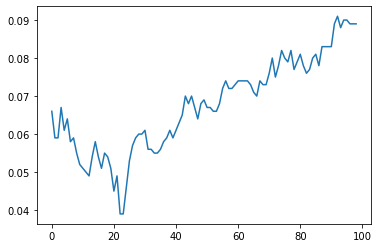

In [13]:
import matplotlib.pyplot as plt

neigh_hash_score = []

for x in range(1,100):
    neigh_hash = KNeighborsClassifier(n_neighbors=x, metric="manhattan")
    neigh_hash.fit(vectors_learn_hash, newsgroups_learn_target)
    neigh_hash_score.append(neigh_hash.score(vectors_test_hash, newsgroups_test_target))
    
plt.plot(neigh_hash_score)

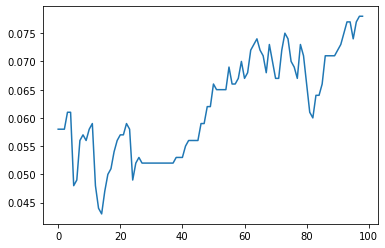

In [14]:
import matplotlib.pyplot as plt

neigh_tfid_score = []

for x in range(1,100):
    neigh_tfid = KNeighborsClassifier(n_neighbors=x, metric="manhattan")
    neigh_tfid.fit(vectors_learn_tfid, newsgroups_learn_target)
    neigh_tfid_score.append(neigh_tfid.score(vectors_test_tfid, newsgroups_test_target))
    
plt.plot(neigh_tfid_score)